In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# headers = ['Data_as_of', 'Start_date', 'End_date', 'Group', 'Year', 'Month', 'State', 'Condition_group', 'Condition', 'Codes', 'Age_group', 'Deaths', 'Number_of_mention', 'Flag']
covid = pd.read_csv("covid_data.csv", header=0, low_memory=False)
covid.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,01/16/2022,01/01/2020,01/15/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1101.0,1149.0,NaN
1,01/16/2022,01/01/2020,01/15/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,4717.0,4879.0,NaN
2,01/16/2022,01/01/2020,01/15/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,12525.0,13002.0,NaN
3,01/16/2022,01/01/2020,01/15/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,31203.0,32341.0,NaN
4,01/16/2022,01/01/2020,01/15/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,67047.0,69280.0,NaN


In [6]:
covid.drop(['Flag', 'ICD10_codes'], inplace=True, axis=1)

# **Part 1**

In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360180 entries, 0 to 360179
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          360180 non-null  object 
 1   Start Date          360180 non-null  object 
 2   End Date            360180 non-null  object 
 3   Group               360180 non-null  object 
 4   Year                347760 non-null  float64
 5   Month               310500 non-null  float64
 6   State               360180 non-null  object 
 7   Condition Group     360180 non-null  object 
 8   Condition           360180 non-null  object 
 9   Age Group           360180 non-null  object 
 10  COVID-19 Deaths     258756 non-null  float64
 11  Number of Mentions  261622 non-null  float64
dtypes: float64(4), object(8)
memory usage: 33.0+ MB


In [8]:
#returns the number of rows if series and returns the row*column if its a dataframe
covid.size

4322160

In [9]:
#returns dimensions of the dataframe 
covid.ndim

2

In [10]:
#shape() gives the size of each dimension
print("Number of rows(records) and columns: ", covid.shape)

Number of rows(records) and columns:  (360180, 12)


In [11]:
#describe() gives the statistical summary for the numerical columns
covid.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,347760.000000,310500.000000,258756.000000,261622.000000
mean,2020.607143,6.280000,147.492510,157.240106
std,0.617559,3.549879,3046.648348,3237.832594
min,2020.000000,1.000000,0.000000,0.000000
25%,2020.000000,3.000000,0.000000,0.000000
50%,2021.000000,6.000000,0.000000,0.000000
75%,2021.000000,9.000000,23.000000,24.000000
max,2022.000000,12.000000,843037.000000,843037.000000


In [12]:
#gives the count of the null values in each column
covid.isnull().sum()

Data As Of                 0
Start Date                 0
End Date                   0
Group                      0
Year                   12420
Month                  49680
State                      0
Condition Group            0
Condition                  0
Age Group                  0
COVID-19 Deaths       101424
Number of Mentions     98558
dtype: int64

In [13]:
percent_missing = covid.isnull().sum() * 100 / len(covid)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
Data As Of,0.000000
Start Date,0.000000
End Date,0.000000
Group,0.000000
Year,3.448276
Month,13.793103
State,0.000000
Condition Group,0.000000
Condition,0.000000
Age Group,0.000000


In [14]:
'''As seen from the above analysis, the rows with Nan value for COVID-19 deaths is not more than 30% so we can remove these rows as it won't have any drastic difference 
in other analysis as the data samples are in huge numbers. '''
covid.dropna(subset=['COVID-19 Deaths'], inplace = True)

In [15]:
covid.isnull().sum()

Data As Of                0
Start Date                0
End Date                  0
Group                     0
Year                  10487
Month                 39241
State                     0
Condition Group           0
Condition                 0
Age Group                 0
COVID-19 Deaths           0
Number of Mentions        0
dtype: int64

In [16]:
#lists all the columns in the dataframe
print(covid.columns)

Index(['Data As Of', 'Start Date', 'End Date', 'Group', 'Year', 'Month',
       'State', 'Condition Group', 'Condition', 'Age Group', 'COVID-19 Deaths',
       'Number of Mentions'],
      dtype='object')


In [17]:
print("Mean of the column COVID-19 Deaths: ", covid["COVID-19 Deaths"].mean())

Mean of the column COVID-19 Deaths:  147.49251031860132


In [18]:
#returns a boolean Series denoting duplicate rows
duplicates = covid.duplicated()
duplicates.sum()

0

In [19]:
from pandas.core.algorithms import value_counts
#returns the count of the unique values in the column
covid["Age Group"].value_counts()

Not stated    35875
0-24          30331
All Ages      28400
25-34         26799
35-44         24038
75-84         23092
85+           22970
65-74         22788
55-64         22257
45-54         22206
Name: Age Group, dtype: int64

In [20]:
covid["Condition Group"].value_counts()

Circulatory diseases                                                         77723
Respiratory diseases                                                         67179
Vascular and unspecified dementia                                            12875
Alzheimer disease                                                            12803
COVID-19                                                                     12465
All other conditions and causes (residual)                                   11583
Diabetes                                                                     11077
Renal failure                                                                10905
Malignant neoplasms                                                          10897
Sepsis                                                                       10810
Intentional and unintentional injury, poisoning, and other adverse events    10364
Obesity                                                                      10075
Name

In [21]:
covid["Year"].value_counts()

2020.0    121670
2021.0    108973
2022.0     17626
Name: Year, dtype: int64

# **Part 2**

Part 2

Perform exploratory analysis on the data. Research online for ideas, and then show analysis on at least five different aspects of the dataset. 

Note: This part is open-ended. Any valid analysis is fine. Use visualizations when necessary.

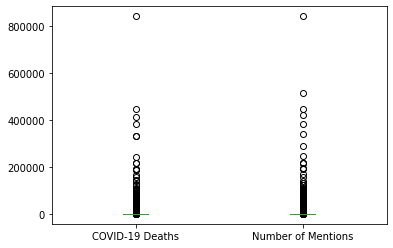

In [23]:
covid[['COVID-19 Deaths','Number of Mentions']].plot.box()

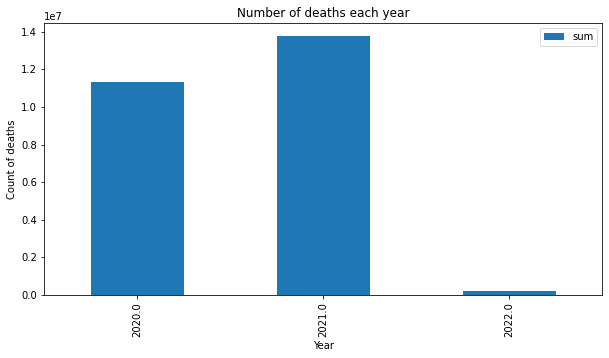

In [51]:
#number of deaths each year
covid.groupby(['Year'])['COVID-19 Deaths'].agg(['sum']).plot(legend=True, kind='bar', figsize=(10, 5), title='Number of deaths each year')
plt.ylabel("Count of deaths")
plt.show()

Text(0, 0.5, 'Death Count')

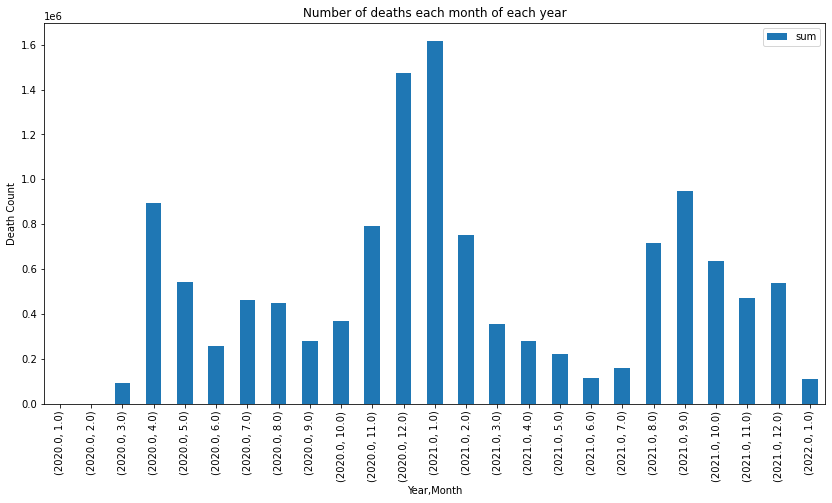

In [53]:
#number of deaths each month of each year
year_month_count = covid.groupby(['Year', 'Month'])['COVID-19 Deaths'].agg(['sum'])
year_month_count.plot(legend = True, kind = 'bar', figsize=(14, 7), title='Number of deaths each month of each year')
plt.ylabel("Death Count")

In [54]:
#Counting number of people with unique condition groups in each state
conditions_state = covid[covid.State != "United States"].groupby(['State', 'Condition Group'])['Condition Group'].agg(['count'])
conditions_state.head(550)

count
State   Condition Group                                          
Alabama All other conditions and causes (residual)            212
        Alzheimer disease                                     213
        COVID-19                                              225
        Circulatory diseases                                 1281
        Diabetes                                              178
...                                                           ...
Texas   Intentional and unintentional injury, poisoning...    176
        Malignant neoplasms                                   198
        Obesity                                               214
        Renal failure                                         231
        Respiratory diseases                                 1292

[550 rows x 1 columns]

In [56]:
#Count of number of people with unique condition groups in Alaska
conditions_alaska = covid[covid["State"]=="Alaska"].groupby(['State', 'Condition Group'])['Condition Group'].agg(['count'])
conditions_alaska

count
State  Condition Group                                          
Alaska All other conditions and causes (residual)            178
       Alzheimer disease                                     249
       COVID-19                                              186
       Circulatory diseases                                 1509
       Diabetes                                              212
       Intentional and unintentional injury, poisoning...    241
       Malignant neoplasms                                   206
       Obesity                                               209
       Renal failure                                         206
       Respiratory diseases                                 1257
       Sepsis                                                219
       Vascular and unspecified dementia                     246

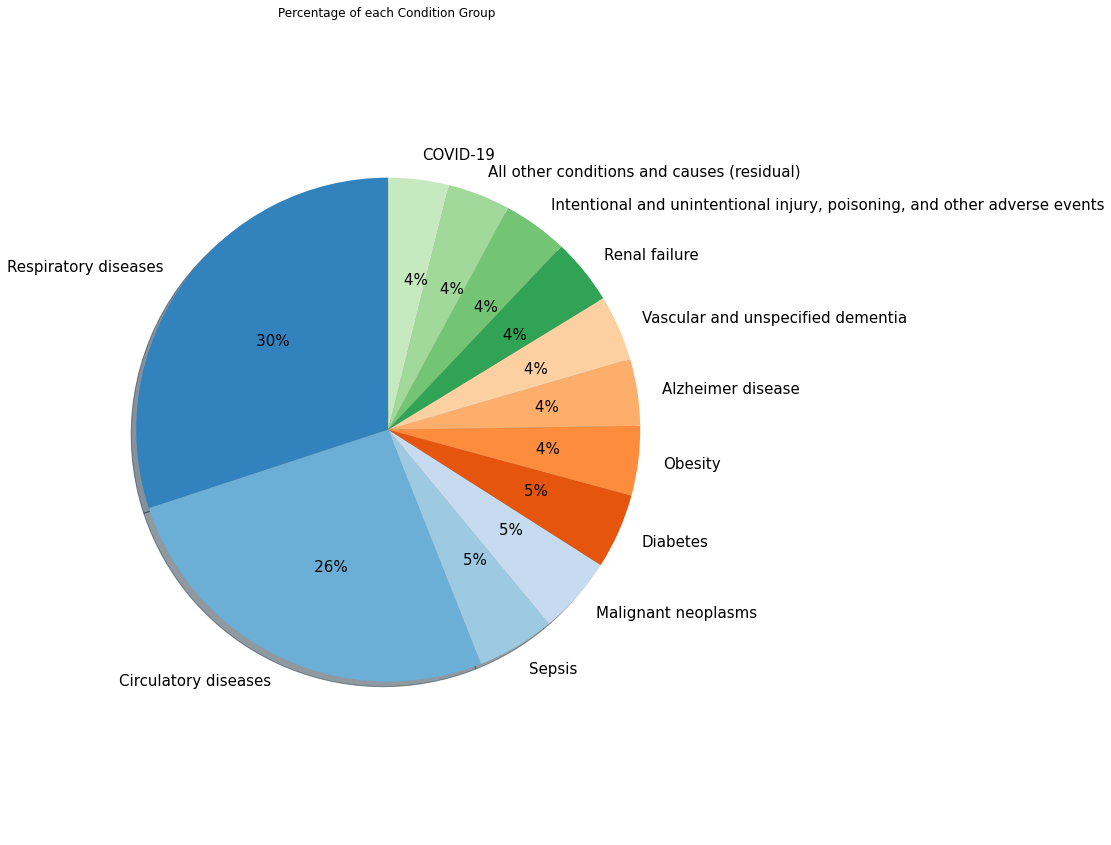

In [59]:
#Percentage of samples for each Condition Group
from IPython.core.pylabtools import figsize
cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(12)*1)
plt.subplots(figsize=(10,15))
plt.title('Percentage of each Condition Group')
plt.pie(x=covid["Condition Group"].value_counts(), colors=colors, labels=covid["Condition Group"].unique(), startangle=90, shadow=True, autopct='%5.0f%%', textprops = {"fontsize":15})
plt.axis('equal')
plt.show()

# **Part 3**

In [60]:
covid.dropna(subset=['Year'], inplace = True)

In [31]:
#filter data with only New England states and the condition group as Circulatory Diseases
subsetDf = covid[(covid["State"].isin(["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont"])) 
    & (covid["Condition Group"] == "Circulatory diseases")]
print("Unique States: ", subsetDf["State"].unique())
print("Only Condition Group: ", subsetDf["Condition Group"].unique())
subsetDf.shape

Unique States:  ['Connecticut' 'Maine' 'Massachusetts' 'New Hampshire' 'Rhode Island'
 'Vermont']
Only Condition Group:  ['Circulatory diseases']


(8517, 12)

Text(0, 0.5, 'Death Count')

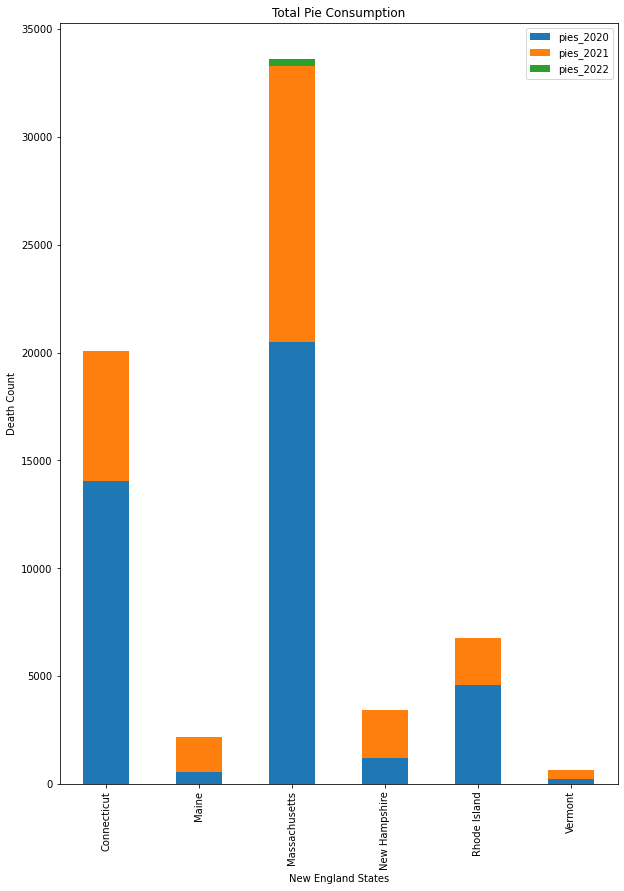

In [33]:
#Death for each New England state in each year
group = subsetDf.groupby(['State', 'Year'])['COVID-19 Deaths'].agg(['sum']).reset_index()
year2020 = group[group['Year'] == 2020]
year2021 = group[group['Year'] == 2021]
year2022 = group[group['Year'] == 2022]

plotdata = pd.DataFrame({
    "pies_2020":year2020['sum'].tolist(),
    "pies_2021":year2021['sum'].tolist(),
    "pies_2022":year2022['sum'].tolist()
    }, 
    index=subsetDf['State'].unique()
)

plotdata.plot(kind='bar', stacked=True, figsize = (10,14))
plt.title("Total Pie Consumption")
plt.xlabel("New England States")
plt.ylabel("Death Count")

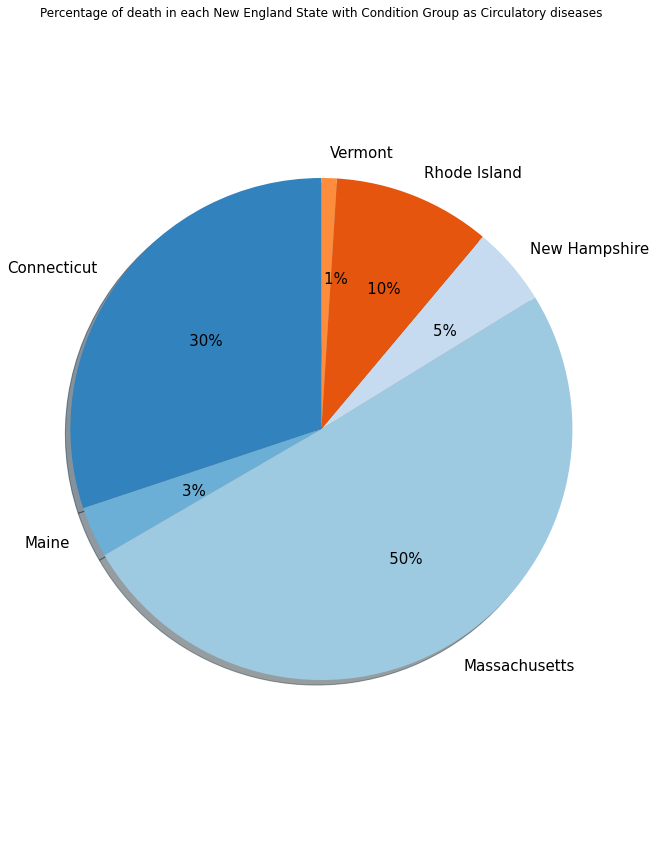

In [35]:
#Percentage of deaths in each New England State
death = subsetDf.groupby(['State'])['COVID-19 Deaths'].agg(['sum'])
cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(12)*1)
plt.subplots(figsize=(10,15))
plt.title('Percentage of death in each New England State with Condition Group as Circulatory diseases')
plt.pie(x=death["sum"], colors=colors, labels=subsetDf["State"].unique(), startangle=90, shadow=True, autopct='%5.0f%%', textprops = {"fontsize":15})
plt.axis('equal')
plt.show()

                    mean
State                   
Connecticut    14.951601
Maine           1.518441
Massachusetts  25.326300
New Hampshire   2.417317
Rhode Island    4.808268
Vermont         0.413642


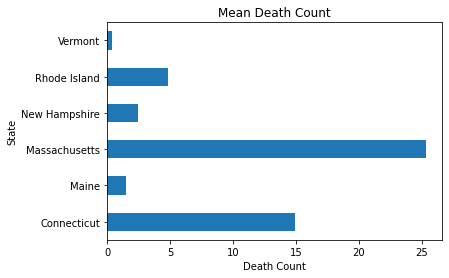

In [36]:
#Plotting Mean of the covid19 deaths for each New England State

df = subsetDf.groupby('State').agg([np.mean])
deaths = df['COVID-19 Deaths']
print(deaths)
deaths.plot(kind = "barh", y = "mean", legend = False,
            title = "Mean Death Count")
plt.xlabel('Death Count')
plt.show()

In [37]:
otherstates_subsetDf = covid[(covid["State"] != "Connecticut") & (covid["State"] != "Maine") & (covid["State"] != "Massachusetts") & 
                             (covid["State"] != "New Hampshire") & (covid["State"] != "Rhode Island") & (covid["State"] != "Vermont") & 
                             (covid["State"] != "United States") & (covid["Condition Group"] == "Circulatory diseases")]
otherstates_subsetDf["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Delaware', 'District of Columbia', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maryland', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Jersey', 'New Mexico', 'New York', 'New York City',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming', 'Puerto Rico'], dtype=object)

In [38]:
otherstates_subsetDf["Condition Group"].unique()

array(['Circulatory diseases'], dtype=object)

Text(0, 0.5, 'Death Count')

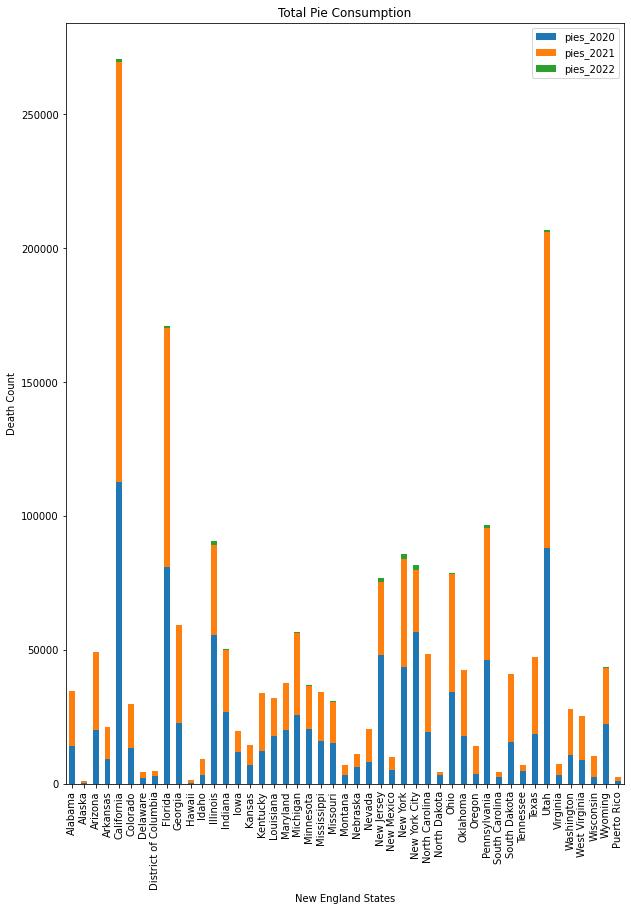

In [39]:
#Death count for other states in each year
group = otherstates_subsetDf.groupby(['State', 'Year'])['COVID-19 Deaths'].agg(['sum']).reset_index()
year2020 = group[group['Year'] == 2020]
year2021 = group[group['Year'] == 2021]
year2022 = group[group['Year'] == 2022]

plotdata = pd.DataFrame({
    "pies_2020":year2020['sum'].tolist(),
    "pies_2021":year2021['sum'].tolist(),
    "pies_2022":year2022['sum'].tolist()
    }, 
    index=otherstates_subsetDf['State'].unique()
)

plotdata.plot(kind='bar', stacked=True, figsize = (10,14))
plt.title("Total Pie Consumption")
plt.xlabel("New England States")
plt.ylabel("Death Count")

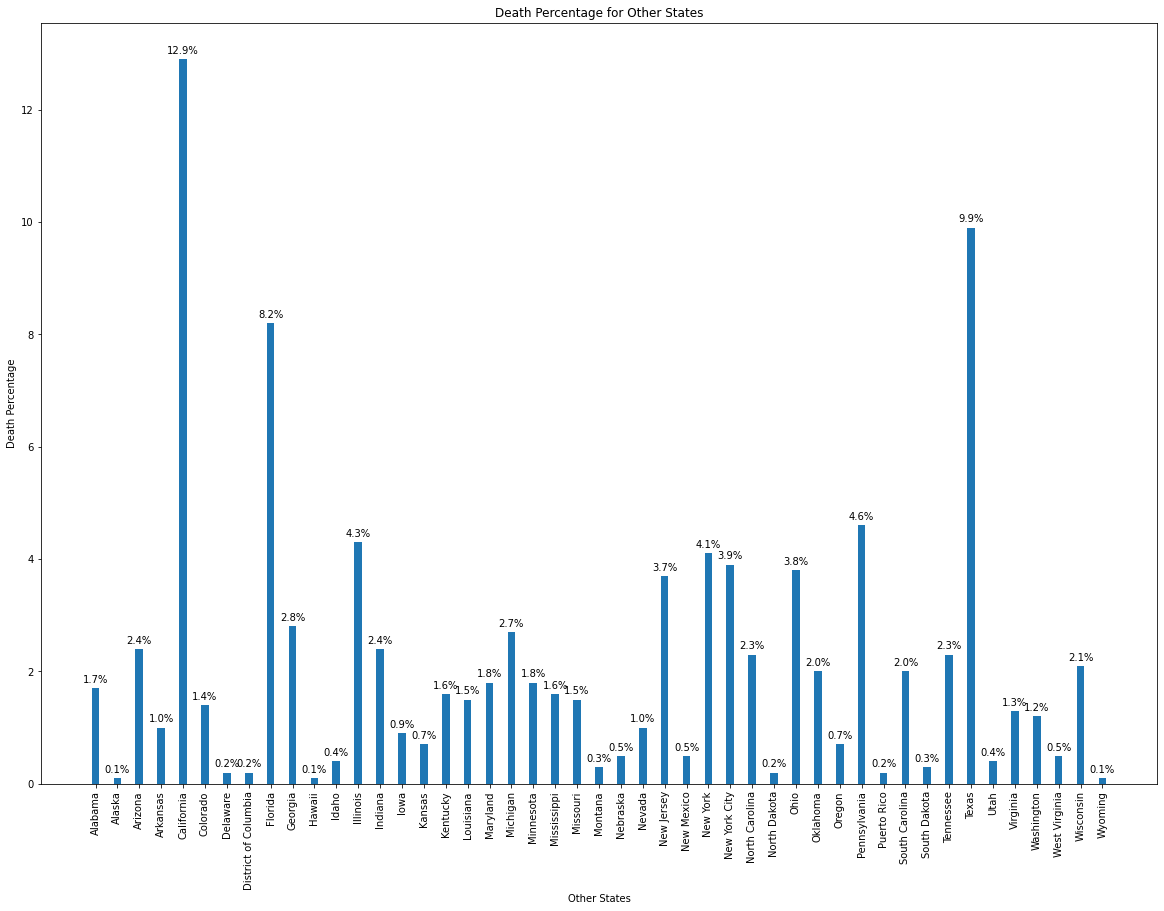

In [65]:
#Percentage of deaths in Other States
death = otherstates_subsetDf.groupby(['State'])['COVID-19 Deaths'].agg(['sum']).reset_index()
deathCount = death['sum']

death['percent'] = (death['sum']/ death['sum'].sum()) * 100

fig, ax = plt.subplots(figsize = (20,14))
plt.xticks(rotation='vertical')
pps = ax.bar(death['State'].unique(), death['percent'].round(1), width, align='center')
for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')

plt.title('Death Percentage for Other States')
plt.xlabel('Other States')
plt.ylabel('Death Percentage')
plt.show()

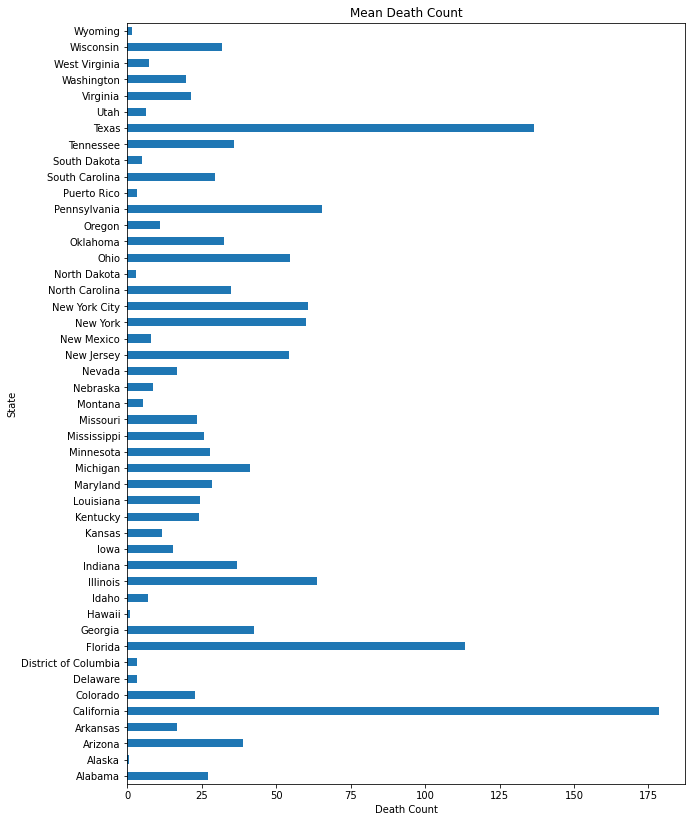

In [41]:
#Plotting Mean of the covid19 deaths for Other States

df = otherstates_subsetDf.groupby('State').agg([np.mean])
deaths = df['COVID-19 Deaths']
# print(deaths)
deaths.plot(kind = "barh", y = "mean", legend = False, title = "Mean Death Count", figsize = (10,14))
plt.xlabel('Death Count')
plt.show()

## **Summary**

1.   In New England, Massachusetts has the highest number of deaths that is around 34000 in total but when we compare in to the highest deaths from other states it is 260000 in California which is extremely high compared to Massachusetts.
1.   When we compare yearly for the two groups of states, again it is seen that the count in California is always higher than the count in Massachusetts each year.
2.   None of the states in New England cross the total death of 100000 but 3 States in the other group cross that count.

# **Part 4**

In [67]:
subsetDf['Age Group'].value_counts()

Not stated    1176
0-24          1156
25-34         1094
35-44         1013
45-54          861
55-64          722
All Ages       672
85-94          611
65-74          607
75-84          605
Name: Age Group, dtype: int64

In [68]:
'''Removing 'All Ages' and changing '85+' to 85-94'''

subsetDf.loc[subsetDf["Age Group"] == "85+", "Age Group"] = "85-94"
finalSubsetDf = subsetDf[(subsetDf['Age Group'] != 'All Ages') & (subsetDf['Age Group'] != 'Not stated')]
finalSubsetDf['Age Group'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


0-24     1156
25-34    1094
35-44    1013
45-54     861
55-64     722
85-94     611
65-74     607
75-84     605
Name: Age Group, dtype: int64

In [69]:
numOfValues = finalSubsetDf['COVID-19 Deaths'].sum()
print("Total frequency: ", numOfValues)

ageCount = finalSubsetDf.groupby(['Age Group'])['COVID-19 Deaths'].agg(['sum']).reset_index()
print(ageCount)

cumsumFq = ageCount['sum'].cumsum().reset_index()
cumFq = numOfValues/2
medianIntervalIndex = cumsumFq[cumsumFq['sum'] < cumFq].count()

medianIntervalDetails = ageCount.iloc[medianIntervalIndex['sum']]
lFq = medianIntervalDetails['sum']

lowerBound = int(medianIntervalDetails["Age Group"][:2])
upperBound = int(medianIntervalDetails["Age Group"][3:5])
width = upperBound - lowerBound

lowerIntervals = ageCount.iloc[0:medianIntervalIndex['sum']].reset_index()
lowerIntervalsCount = lowerIntervals['sum'].agg('sum')

Total frequency:  30638.0
  Age Group      sum
0      0-24      0.0
1     25-34     14.0
2     35-44     29.0
3     45-54    309.0
4     55-64   2138.0
5     65-74   5242.0
6     75-84   8548.0
7     85-94  14358.0


In [71]:
#Variables required for median
print('Width = ', width)
print('Lower bound = ', lowerBound)
print('Frequency Median = ', lFq)
print('Sum of the frequencies of the intervals below the median interval = ', lowerIntervalsCount)
print("Total frequency: ", numOfValues)

Width =  9
Lower bound =  75
Frequency Median =  8548.0
Sum of the frequencies of the intervals below the median interval =  7732.0
Total frequency:  30638.0


In [72]:
#calculating the median age for COVID-19 related deaths for the New England states
median = lowerBound + ((((numOfValues/2) - lowerIntervalsCount)/lFq)*width)
print("Median age: ", median)

Median age:  82.98818437061301


Hence, the median age for the COVID-19 deaths for New England states with Condition group as Circulatory Diseases is around 83. And it falls under the 75-84 age interval group.